In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("BTCUSDT_15min.csv")

In [13]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
# Convert to IST
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')

# Extract hour and day of week
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day_name()

In [14]:
# Aggregate volume into hourly bins
pivot = df.groupby(['day', 'hour'])['volume'].sum().unstack(fill_value=0)

# Reorder days for readability (Mon → Sun)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(days_order)

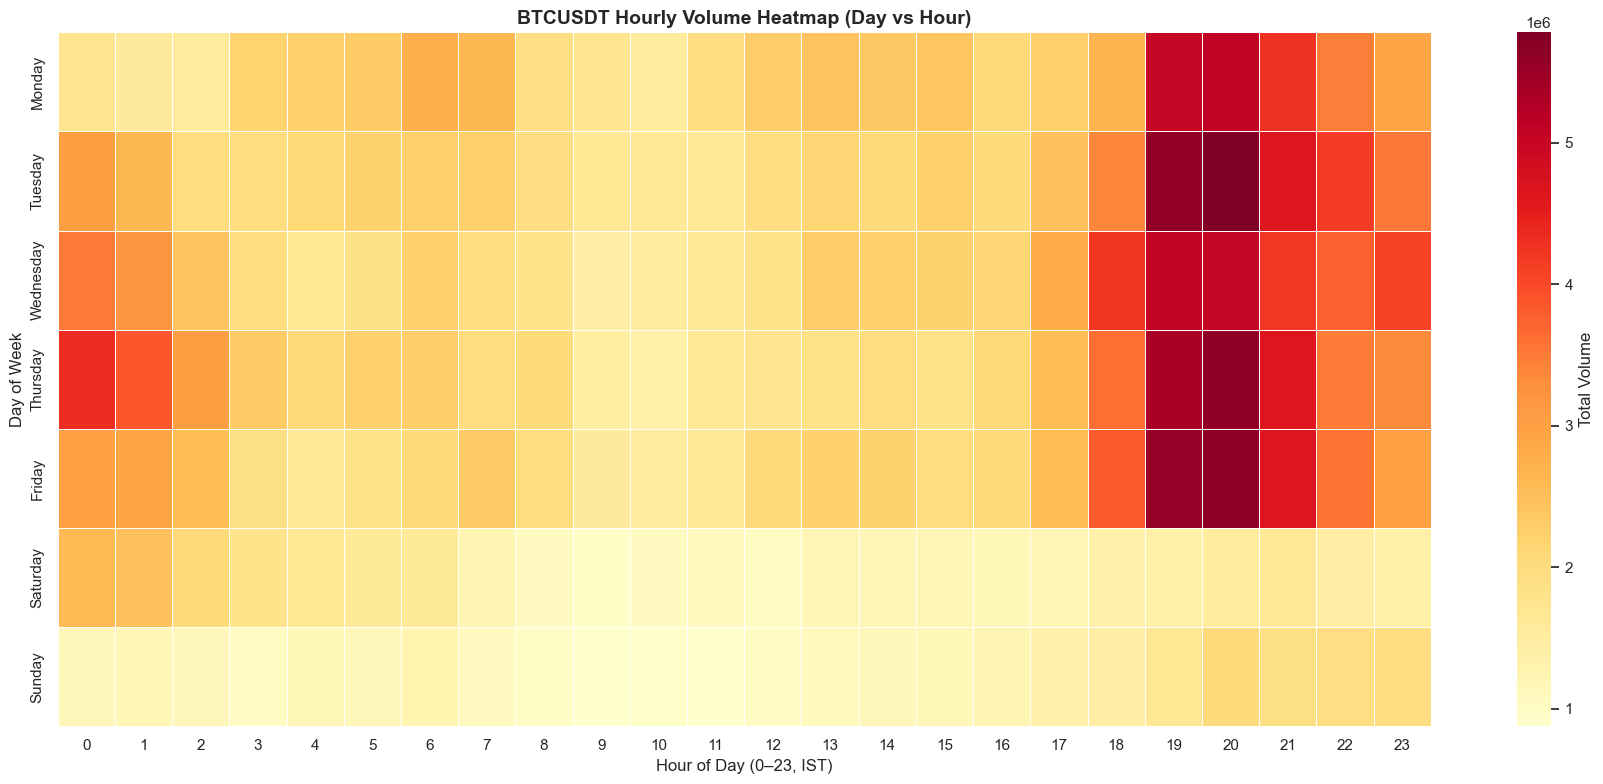

In [19]:
# --- Plot Heatmap ---
plt.figure(figsize=(18,8))
sns.set(style="whitegrid")

ax = sns.heatmap(
    pivot,
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "Total Volume"},
)

ax.set_title("BTCUSDT Hourly Volume Heatmap (Day vs Hour)", fontsize=14, fontweight="bold")
ax.set_xlabel("Hour of Day (0–23, IST)")
ax.set_ylabel("Day of Week")

plt.tight_layout()
plt.show()